In [1]:
try:
  from google.colab import drive
  drive.mount('/content/drive/')
  shared_drive_foldername = 'NUTRECON'
  root = '/content/drive/Shareddrives/{}/'.format(shared_drive_foldername)
  !pip install pandas==1.4.2
  print('Running Code in Colab')
# ...or locally
except:
  # define the local directory of the project
  root = 'D:/FV/Projects/NUTRECON/nutreconDrive/'
  print('Running Code locally')

import numpy as np
import sys
sys.path.append(root + 'python')
import nutrecon_simulation as sim

Running Code locally


# Testing Functions & routines

## Task parameters

In [2]:
uniqueLott_Nreps= 6      # Unique Lottery Repititions  

# Same-type & mixed type Trials Lottery probabilities
st_refPs = [1]                              # Reference option
st_lottPs = [0.13, 0.22, 0.38, .50, .75]    # Lottery option

# Same-type task variables
st_money_refQs = [1]                               # Euros
st_money_lottQs = [1, 2, 5, 12, 20]                # Euros

st_cPlus_refQs = [20]                              # mL of CS+ yogurt 
st_cPlus_lottQs = [20, 40, 80, 120, 200]           # mL of CS+ yogurt

st_cMinus_refQs = st_cPlus_refQs                      # mL of CS- yogurt 
st_cMinus_lottQs = st_cPlus_lottQs                    # mL of CS- yogurt 

# Mixed-type task variables
mt_refQs = [.2]                                # Euros
mt_refPs = [1]
mt_lottPs = [0.13, 0.22, 0.38, .50, .75]

mt_cPlus_lottQs = [40, 80, 120, 150, 200]      # mL of CS+ yogurt 
mt_cMinus_lottQs = mt_cPlus_lottQs            # mL of CS- yogurt 


allTrials_df = sim.pack_taskParameters(
                st_refPs, st_lottPs, st_money_refQs, st_money_lottQs, st_cPlus_refQs, st_cPlus_lottQs,
                st_cMinus_refQs, st_cMinus_lottQs, mt_refQs, mt_refPs, mt_lottPs, mt_cPlus_lottQs,
                mt_cMinus_lottQs, uniqueLott_Nreps)

print('Trials per type:\n{}'.format(allTrials_df['trial_type'].value_counts()))

Trials per type:
same     450
mixed    300
Name: trial_type, dtype: int64


## Subject specific parameters

In [3]:
# Subject specific parameters
st_money_alpha = 0.7
st_cPlus_alpha = 0.8
st_cMinus_alpha = 0.8

st_money_beta = 1.8
st_cPlus_beta = st_money_beta
st_cMinus_beta = st_money_beta

mt_cPlus_beta = st_money_beta
mt_cMinus_beta = st_money_beta
cPlus_sFactor = .2
cMinus_sFactor = .2

subjectTrials_df = sim._pack_subjectParameters(st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, st_money_beta, 
                                              st_cPlus_beta, st_cMinus_beta, mt_cPlus_beta, mt_cMinus_beta, 
                                              cPlus_sFactor, cMinus_sFactor, 
                                              allTrials_df)
subjectTrials_df


,trial_type,ref_type,ref_qt,ref_prob,lott_type,lott_qt,lott_prob,ref_alpha,lott_alpha,beta,sFactor
0,same,Money,1.0,1,Money,1,0.13,0.7,0.7,1.8,1.0
1,same,Money,1.0,1,Money,1,0.22,0.7,0.7,1.8,1.0
2,same,Money,1.0,1,Money,1,0.38,0.7,0.7,1.8,1.0
3,same,Money,1.0,1,Money,1,0.50,0.7,0.7,1.8,1.0
4,same,Money,1.0,1,Money,1,0.75,0.7,0.7,1.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...
745,mixed,Money,0.2,1,CS-,200,0.13,0.7,0.8,1.8,0.2
746,mixed,Money,0.2,1,CS-,200,0.22,0.7,0.8,1.8,0.2
747,mixed,Money,0.2,1,CS-,200,0.38,0.7,0.8,1.8,0.2
748,mixed,Money,0.2,1,CS-,200,0.50,0.7,0.8,1.8,0.2


### Simulate choices

In [4]:
seed = 1
np.random.seed(seed)

subjectTrials_df = sim._get_subject_choices(subjectTrials_df)
subjectTrials_df

,trial_type,ref_type,ref_qt,ref_prob,lott_type,lott_qt,lott_prob,ref_alpha,lott_alpha,beta,sFactor,ref_EU,lott_EU,pL,choice
0,same,Money,1.0,1,Money,1,0.13,0.7,0.7,1.8,1.0,1.000000,0.130000,0.172787,0
1,same,Money,1.0,1,Money,1,0.22,0.7,0.7,1.8,1.0,1.000000,0.220000,0.197182,0
2,same,Money,1.0,1,Money,1,0.38,0.7,0.7,1.8,1.0,1.000000,0.380000,0.246754,0
3,same,Money,1.0,1,Money,1,0.50,0.7,0.7,1.8,1.0,1.000000,0.500000,0.289050,0
4,same,Money,1.0,1,Money,1,0.75,0.7,0.7,1.8,1.0,1.000000,0.750000,0.389361,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,mixed,Money,0.2,1,CS-,200,0.13,0.7,0.8,1.8,0.2,0.324131,9.010883,0.934654,1
746,mixed,Money,0.2,1,CS-,200,0.22,0.7,0.8,1.8,0.2,0.324131,15.249187,0.992654,1
747,mixed,Money,0.2,1,CS-,200,0.38,0.7,0.8,1.8,0.2,0.324131,26.339504,0.999863,1
748,mixed,Money,0.2,1,CS-,200,0.50,0.7,0.8,1.8,0.2,0.324131,34.657242,0.999993,1


## Parameter Estimation

In [5]:
alphaMoney0 = st_money_alpha
alphaCplus0 = st_cPlus_alpha
alphaCminus0 = st_cMinus_alpha
st_betaMoney0 = st_money_beta # also used in model with only one beta
st_betaCplus0 = st_cPlus_beta
st_betaCminus0 = st_cMinus_beta
mt_betaCplus0 = mt_cPlus_beta
mt_betaCminus0 = mt_cMinus_beta
sFactorCplus0 = cPlus_sFactor
sFactorCminus0= cMinus_sFactor


x0_10params = (alphaMoney0, alphaCplus0, alphaCminus0, 
      st_betaMoney0, st_betaCplus0, st_betaCminus0, mt_betaCplus0, mt_betaCminus0,
      sFactorCplus0, sFactorCminus0)

x0_6params = (alphaMoney0, alphaCplus0, alphaCminus0, 
      st_betaMoney0,
      sFactorCplus0, sFactorCminus0)

### Likelihood calculation

In [6]:
# Checking if Likelihood calculation is working for simultaneous estimation and 6 parameters


df = subjectTrials_df.copy()

df['likelihood'] = df.apply(lambda row: sim._get_likelihood(row, x0_6params), axis = 1)

tmp_df = df[['pL','choice', 'likelihood']].copy()

mask_0 = tmp_df['choice'] == 0
mask_1 = tmp_df['choice'] == 1

tmp_df.loc[mask_0,'check'] = 1 - tmp_df.loc[mask_0,'pL'] - tmp_df.loc[mask_0,'likelihood']
tmp_df.loc[mask_1,'check'] = tmp_df.loc[mask_1,'pL'] - tmp_df.loc[mask_1,'likelihood']


if tmp_df['check'].max() == 0:
    print('Likelihood well calculated.')
else:
    print('something\'s wrong')

Likelihood well calculated.


In [7]:
# Checking if Likelihood calculation is working for simultaneous estimation and 10 parameters


df = subjectTrials_df.copy()

df['likelihood'] = df.apply(lambda row: sim._get_likelihood(row, x0_10params), axis = 1)

tmp_df = df[['pL','choice', 'likelihood']].copy()

mask_0 = tmp_df['choice'] == 0
mask_1 = tmp_df['choice'] == 1

tmp_df.loc[mask_0,'check'] = 1 - tmp_df.loc[mask_0,'pL'] - tmp_df.loc[mask_0,'likelihood']
tmp_df.loc[mask_1,'check'] = tmp_df.loc[mask_1,'pL'] - tmp_df.loc[mask_1,'likelihood']


if tmp_df['check'].max() == 0:
    print('Likelihood well calculated.')
else:
    print('something\'s wrong')


Likelihood well calculated.


In [8]:
# Checking if Likelihood calculation is working for stepwise estimation and 6 parameters
df = subjectTrials_df.copy()

(st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
    beta,
    cPlus_sFactor, cMinus_sFactor) = x0_6params
st_params = (st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
            beta)
mt_params = (cPlus_sFactor, cMinus_sFactor)


st_mask = df[sim.column_names[0]] == 'same'
df.loc[st_mask,'likelihood'] = df.loc[st_mask,:].apply(lambda row: sim._get_st_likelihood(row, st_params), axis = 1)

mt_mask = df[sim.column_names[0]] == 'mixed'
cPlus_mask = df[sim.column_names[4]] == 'CS+'
cMinus_mask = df[sim.column_names[4]] == 'CS-'

money_alpha_est = st_money_alpha
cPlus_alpha_est = st_cPlus_alpha
cMinus_alpha_est = st_cMinus_alpha
beta_est = st_money_beta

df.loc[mt_mask, sim.optimize_cols[8]] = money_alpha_est
df.loc[cPlus_mask, sim.optimize_cols[9]] = st_cPlus_alpha
df.loc[cMinus_mask, sim.optimize_cols[9]] = cMinus_alpha_est
df.loc[mt_mask, sim.optimize_cols[10]] = beta_est

df.loc[mt_mask,'likelihood'] = df.loc[mt_mask,:].apply(lambda row: sim._get_mt_likelihood(row, mt_params), axis = 1)

tmp_df = df[['pL','choice', 'likelihood']].copy()

mask_0 = tmp_df['choice'] == 0
mask_1 = tmp_df['choice'] == 1

tmp_df.loc[mask_0,'check'] = 1 - tmp_df.loc[mask_0,'pL'] - tmp_df.loc[mask_0,'likelihood']
tmp_df.loc[mask_1,'check'] = tmp_df.loc[mask_1,'pL'] - tmp_df.loc[mask_1,'likelihood']


if tmp_df['check'].max() == 0:
    print('Likelihood well calculated.')
else:
    print('something\'s wrong')

Likelihood well calculated.


In [9]:
# Checking if Likelihood calculation is working for stepwise estimation and 10 parameters

df = subjectTrials_df.copy()

(st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
    st_money_beta, st_cPlus_beta, st_cMinus_beta,
    mt_cPlus_beta, mt_cMinus_beta,
    cPlus_sFactor, cMinus_sFactor) = x0_10params
st_params = (st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
            st_money_beta, st_cPlus_beta, st_cMinus_beta)
mt_params = (mt_cPlus_beta, mt_cMinus_beta,
            cPlus_sFactor, cMinus_sFactor)

st_mask = df[sim.column_names[0]] == 'same'
df.loc[st_mask,'likelihood'] = df.loc[st_mask,:].apply(lambda row: sim._get_st_likelihood(row, st_params), axis = 1)

mt_mask = df[sim.column_names[0]] == 'mixed'
cPlus_mask = df[sim.column_names[4]] == 'CS+'
cMinus_mask = df[sim.column_names[4]] == 'CS-'

money_alpha_est = st_money_alpha
cPlus_alpha_est = st_cPlus_alpha
cMinus_alpha_est = st_cMinus_alpha

df.loc[mt_mask, sim.optimize_cols[8]] = money_alpha_est
df.loc[cPlus_mask, sim.optimize_cols[9]] = st_cPlus_alpha
df.loc[cMinus_mask, sim.optimize_cols[9]] = cMinus_alpha_est

df.loc[mt_mask,'likelihood'] = df.loc[mt_mask,:].apply(lambda row: sim._get_mt_likelihood(row, mt_params), axis = 1)

tmp_df = df[['pL','choice', 'likelihood']].copy()

mask_0 = tmp_df['choice'] == 0
mask_1 = tmp_df['choice'] == 1

tmp_df.loc[mask_0,'check'] = 1 - tmp_df.loc[mask_0,'pL'] - tmp_df.loc[mask_0,'likelihood']
tmp_df.loc[mask_1,'check'] = tmp_df.loc[mask_1,'pL'] - tmp_df.loc[mask_1,'likelihood']

if tmp_df['check'].max() == 0:
    print('Likelihood well calculated.')
else:
    print('something\'s wrong')

Likelihood well calculated.


### Model Fit

In [10]:
alphaMoney0 = 1
alphaCplus0 = 1
alphaCminus0 = 1
st_betaMoney0 = 1 # also used in model with only one beta
st_betaCplus0 = 1
st_betaCminus0 = 1
mt_betaCplus0 = 1
mt_betaCminus0 = 1
sFactorCplus0 = 1
sFactorCminus0= 1


x0_10params = (alphaMoney0, alphaCplus0, alphaCminus0, 
      st_betaMoney0, st_betaCplus0, st_betaCminus0, mt_betaCplus0, mt_betaCminus0,
      sFactorCplus0, sFactorCminus0)

x0_6params = (alphaMoney0, alphaCplus0, alphaCminus0, 
      st_betaMoney0,
      sFactorCplus0, sFactorCminus0)

In [11]:

args = (subjectTrials_df.copy())
res_st, res_mt = sim.stepwise_estimate(args, x0_6params)



D:\FV/Projects/NUTRECON/nutreconDrive/python\nutrecon_simulation.py:283: RuntimeWarning: divide by zero encountered in log
  negloglikelihood = - np.sum(np.log(likelihood))
D:\FV/Projects/NUTRECON/nutreconDrive/python\nutrecon_simulation.py:283: RuntimeWarning: divide by zero encountered in log
  negloglikelihood = - np.sum(np.log(likelihood))
c:\Users\Admin\anaconda3\envs\nutrecon\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
D:\FV/Projects/NUTRECON/nutreconDrive/python\nutrecon_simulation.py:283: RuntimeWarning: divide by zero encountered in log
  negloglikelihood = - np.sum(np.log(likelihood))
c:\Users\Admin\anaconda3\envs\nutrecon\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
D:\FV/Projects/NUTRECON/nutreconDrive/python\nutrecon_simulation.py:283: RuntimeWarning: divide by zero encountered in log
  negloglikelihood = - np.sum(np.l

In [12]:
sim.print_stepwiseModel_output(res_st, res_mt)

Same type trials
  Optimization terminated successfully.
    - parameters: [0.64291463 0.82622092 0.8073762  2.15428643]
  - std. error: [0.04807579 0.01951856 0.02585278 0.34549009]

Confidene intervals:
  - parameter 1: 0.643 ± 0.094
  - parameter 2: 0.826 ± 0.038
  - parameter 3: 0.807 ± 0.051
  - parameter 4: 2.154 ± 0.677

Mixed type trials
  Optimization terminated successfully.
    - parameters: [0.15676048 0.20933576]
  - std. error: [0.02218035 0.03248391]

  Confidene intervals:
    - parameter 1: 0.157 ± 0.043
    - parameter 2: 0.209 ± 0.064


In [13]:
args = (subjectTrials_df.copy())
res_st, res_mt = sim.stepwise_estimate(args, x0_10params)

D:\FV/Projects/NUTRECON/nutreconDrive/python\nutrecon_simulation.py:37: RuntimeWarning: overflow encountered in exp
  return 1 - 1/(1 + np.exp(beta * (euL * sFactor - euR)))
D:\FV/Projects/NUTRECON/nutreconDrive/python\nutrecon_simulation.py:274: RuntimeWarning: divide by zero encountered in log
  negloglikelihood = - np.sum(np.log(likelihood))
D:\FV/Projects/NUTRECON/nutreconDrive/python\nutrecon_simulation.py:37: RuntimeWarning: overflow encountered in exp
  return 1 - 1/(1 + np.exp(beta * (euL * sFactor - euR)))
D:\FV/Projects/NUTRECON/nutreconDrive/python\nutrecon_simulation.py:274: RuntimeWarning: divide by zero encountered in log
  negloglikelihood = - np.sum(np.log(likelihood))
c:\Users\Admin\anaconda3\envs\nutrecon\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
D:\FV/Projects/NUTRECON/nutreconDrive/python\nutrecon_simulation.py:37: RuntimeWarning: overflow encountered in exp
  return 1 - 1/(1 + np.exp(b

In [19]:
sim.print_stepwiseModel_output(res_st, res_mt)

Same type trials
  Desired error not necessarily achieved due to precision loss.
    - parameters: [ 0.66077004  0.84271855  0.84036561  1.85518775 13.31316625 15.52925424]
  - std. error: [0.05954473 0.00317353 0.00358439 0.43420149 0.01119969 0.44352505]

Confidene intervals:
  - parameter 1: 0.661 ± 0.117
  - parameter 2: 0.843 ± 0.006
  - parameter 3: 0.84 ± 0.007
  - parameter 4: 1.855 ± 0.851
  - parameter 5: 13.313 ± 0.022
  - parameter 6: 15.529 ± 0.869

Mixed type trials
  Desired error not necessarily achieved due to precision loss.
    - parameters: [9.03350337e-04 3.03540934e+00 2.55705825e+02 1.41302861e-01]
  - std. error: [9.03346924e-05 2.12689082e+00 2.13924424e+00 6.72868562e-02]

  Confidene intervals:
    - parameter 1: 0.001 ± 0.0
    - parameter 2: 3.035 ± 4.169
    - parameter 3: 255.706 ± 4.193
    - parameter 4: 0.141 ± 0.132


In [ ]:
res = sim.simultaneous_estimate(args, x0_6params)

D:\FV/Projects/NUTRECON/nutreconDrive/python\nutrecon_simulation.py:120: RuntimeWarning: overflow encountered in exp
  return 1 - 1/(1 + np.exp(beta * (euL * sFactor - euR)))
D:\FV/Projects/NUTRECON/nutreconDrive/python\nutrecon_simulation.py:362: RuntimeWarning: divide by zero encountered in log
  negloglikelihood = - np.sum(np.log(likelihood))
D:\FV/Projects/NUTRECON/nutreconDrive/python\nutrecon_simulation.py:120: RuntimeWarning: overflow encountered in exp
  return 1 - 1/(1 + np.exp(beta * (euL * sFactor - euR)))
D:\FV/Projects/NUTRECON/nutreconDrive/python\nutrecon_simulation.py:362: RuntimeWarning: divide by zero encountered in log
  negloglikelihood = - np.sum(np.log(likelihood))
c:\Users\Admin\anaconda3\envs\nutrecon\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
D:\FV/Projects/NUTRECON/nutreconDrive/python\nutrecon_simulation.py:120: RuntimeWarning: overflow encountered in exp
  return 1 - 1/(1 + np.ex

In [ ]:
sim.print_simultaneousModel_output(res)

Optimization terminated successfully.
  - parameters: [0.65047423 0.82523785 0.80694597 2.08019457 0.1609572  0.21458725]
  - std. error: [0.04810252 0.02048862 0.02644946 0.32626311 0.03532323 0.04970747]

Confidene intervals:
  - parameter 1: 0.65 ± 0.094
  - parameter 2: 0.825 ± 0.04
  - parameter 3: 0.807 ± 0.052
  - parameter 4: 2.08 ± 0.639
  - parameter 5: 0.161 ± 0.069
  - parameter 6: 0.215 ± 0.097


In [ ]:
res = sim.simultaneous_estimate(args, x0_10params)

D:\FV/Projects/NUTRECON/nutreconDrive/python\nutrecon_simulation.py:362: RuntimeWarning: divide by zero encountered in log
  negloglikelihood = - np.sum(np.log(likelihood))
D:\FV/Projects/NUTRECON/nutreconDrive/python\nutrecon_simulation.py:362: RuntimeWarning: divide by zero encountered in log
  negloglikelihood = - np.sum(np.log(likelihood))
c:\Users\Admin\anaconda3\envs\nutrecon\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
D:\FV/Projects/NUTRECON/nutreconDrive/python\nutrecon_simulation.py:362: RuntimeWarning: divide by zero encountered in log
  negloglikelihood = - np.sum(np.log(likelihood))
c:\Users\Admin\anaconda3\envs\nutrecon\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
D:\FV/Projects/NUTRECON/nutreconDrive/python\nutrecon_simulation.py:362: RuntimeWarning: divide by zero encountered in log
  negloglikelihood = - np.sum(np.l

In [ ]:
sim.print_simultaneousModel_output(res)

Desired error not necessarily achieved due to precision loss.
  - parameters: [6.60772605e-01 8.44967993e-01 8.44119897e-01 1.85517988e+00
 3.71777455e+02 7.70333071e+01 2.66148130e-03 3.02040032e+00
 8.59764771e+01 1.39460227e-01]
  - std. error: [4.53192475e-02 1.08150826e-04 6.42717444e-04 3.31328430e-01
 7.61466405e+00 9.06893221e-01 4.56256523e-04 8.88762040e-01
 2.57293124e+00 3.31200268e-02]

Confidene intervals:
  - parameter 1: 0.661 ± 0.089
  - parameter 2: 0.845 ± 0.0
  - parameter 3: 0.844 ± 0.001
  - parameter 4: 1.855 ± 0.649
  - parameter 5: 371.777 ± 14.925
  - parameter 6: 77.033 ± 1.778
  - parameter 7: 0.003 ± 0.001
  - parameter 8: 3.02 ± 1.742
  - parameter 9: 85.976 ± 5.043
  - parameter 10: 0.139 ± 0.065


# Simulation

## Task Parameters

In [15]:
uniqueLott_Nreps= 6      # Unique Lottery Repititions  

# Same-type & mixed type Trials Lottery probabilities
st_refPs = [1]                              # Reference option
st_lottPs = [0.13, 0.22, 0.38, .50, .75]    # Lottery option

# Same-type task variables
st_money_refQs = [1]                               # Euros
st_money_lottQs = [1, 2, 5, 12, 20]                # Euros

st_cPlus_refQs = [20]                              # mL of CS+ yogurt 
st_cPlus_lottQs = [20, 40, 80, 120, 200]           # mL of CS+ yogurt

st_cMinus_refQs = st_cPlus_refQs                      # mL of CS- yogurt 
st_cMinus_lottQs = st_cPlus_lottQs                    # mL of CS- yogurt 

# Mixed-type task variables
mt_refQs = [.2]                                # Euros
mt_refPs = [1]
mt_lottPs = [0.13, 0.22, 0.38, .50, .75]

mt_cPlus_lottQs = [40, 80, 120, 150, 200]      # mL of CS+ yogurt 
mt_cMinus_lottQs = mt_cPlus_lottQs            # mL of CS- yogurt 


allTrials_df = sim.pack_taskParameters(
                st_refPs, st_lottPs, st_money_refQs, st_money_lottQs, st_cPlus_refQs, st_cPlus_lottQs,
                st_cMinus_refQs, st_cMinus_lottQs, mt_refQs, mt_refPs, mt_lottPs, mt_cPlus_lottQs,
                mt_cMinus_lottQs, uniqueLott_Nreps)

print('Trials per type:\n{}'.format(allTrials_df['trial_type'].value_counts()))

Trials per type:
same     450
mixed    300
Name: trial_type, dtype: int64


## Initialization Parameters

In [ ]:
alphaMoney0 = 1
alphaCplus0 = 1
alphaCminus0 = 1
st_betaMoney0 = 1 # also used in model with only one beta
st_betaCplus0 = 1
st_betaCminus0 = 1
mt_betaCplus0 = 1
mt_betaCminus0 = 1
sFactorCplus0 = 1
sFactorCminus0= 1


x0_10params = (alphaMoney0, alphaCplus0, alphaCminus0, 
      st_betaMoney0, st_betaCplus0, st_betaCminus0, mt_betaCplus0, mt_betaCminus0,
      sFactorCplus0, sFactorCminus0)

x0_6params = (alphaMoney0, alphaCplus0, alphaCminus0, 
      st_betaMoney0,
      sFactorCplus0, sFactorCminus0)

## Generate parameters per participant

In [48]:
from tqdm import tqdm
from numpy import random

N_iter = 100

# mean parameters
mean_st_money_alpha = 0.7
mean_st_cPlus_alpha = 0.8
mean_st_cMinus_alpha = 0.8
mean_st_money_beta = 1.8
mean_st_cPlus_beta = st_money_beta
mean_st_cMinus_beta = st_money_beta
mean_mt_cPlus_beta = st_money_beta
mean_mt_cMinus_beta = st_money_beta
mean_cPlus_sFactor = .2
mean_cMinus_sFactor = .2

std_st_money_alpha = 0.1
std_st_cPlus_alpha = 0.1
std_st_cMinus_alpha = 0.1
std_st_money_beta = 0.2
std_st_cPlus_beta = std_st_money_beta
std_st_cMinus_beta = std_st_money_beta
std_mt_cPlus_beta = std_st_money_beta
std_mt_cMinus_beta = st_money_beta
std_cPlus_sFactor = 0
std_cMinus_sFactor = 0


st_money_alpha_arr = random.normal(mean_st_money_alpha, std_st_money_alpha, N_iter)
st_cPlus_alpha_arr = random.normal(mean_st_cPlus_alpha, std_st_cPlus_alpha, N_iter)
st_cMinus_alpha_arr = random.normal(mean_st_cMinus_alpha, std_st_cMinus_alpha, N_iter)
st_money_beta_arr = random.normal(mean_st_money_beta, std_st_money_beta, N_iter)
st_cPlus_beta_arr = random.normal(mean_st_cPlus_beta, std_st_cPlus_beta, N_iter)
st_cMinus_beta_arr = random.normal(mean_st_cMinus_beta, std_st_cMinus_beta, N_iter)
mt_cPlus_beta_arr = random.normal(mean_mt_cPlus_beta, std_mt_cPlus_beta, N_iter)
mt_cMinus_beta_arr = random.normal(mean_mt_cMinus_beta, std_mt_cMinus_beta, N_iter)
cPlus_sFactor_arr = random.normal(mean_cPlus_sFactor, std_cPlus_sFactor, N_iter)
cMinus_sFactor_arr = random.normal(mean_cMinus_sFactor, std_cMinus_sFactor, N_iter)

st_pars = np.stack([st_money_alpha_arr, st_cPlus_alpha_arr, st_cMinus_alpha_arr,
                    st_money_beta_arr,
                    ] )

mt_pars = np.stack([mt_cPlus_beta_arr, mt_cMinus_beta_arr,
                    cPlus_sFactor_arr, cMinus_sFactor_arr])

flags = []

st_estPars = np.zeros((N_iter, 4))
mt_estPars = np.zeros((N_iter, 2))
st_hessians = np.zeros((N_iter, 4, 4))
mt_hessians = np.zeros((N_iter, 2, 2))

import warnings
warnings.filterwarnings("ignore")

for i in tqdm(range(N_iter)):
    # Generate alphas per participant
    st_money_alpha = st_money_alpha_arr[i]
    st_cPlus_alpha = st_cPlus_alpha_arr[i]
    st_cMinus_alpha = st_cMinus_alpha_arr[i]
    st_money_beta = st_money_beta_arr[i]
    st_cPlus_beta = st_cPlus_beta_arr[i]
    st_cMinus_beta = st_cMinus_beta_arr[i]
    mt_cPlus_beta = mt_cPlus_beta_arr[i]
    mt_cMinus_beta = mt_cMinus_beta_arr[i]
    cPlus_sFactor = cPlus_sFactor_arr[i]
    cMinus_sFactor = cMinus_sFactor_arr[i]

    subjectTrials_df = sim.pack_subjectParameters(st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
                                                  st_money_beta, st_cPlus_beta, st_cMinus_beta, 
                                                  mt_cPlus_beta, mt_cMinus_beta, 
                                                  cPlus_sFactor, cMinus_sFactor, 
                                                  allTrials_df)
    
    res_st, res_mt = sim.stepwise_estimate(subjectTrials_df, x0_6params)
    
    flags.append(not(res_st.success & res_mt.success))

    st_estPars[i, :] = res_st.x
    st_hessians[i, :, :] = res_st.hess_inv
    mt_estPars[i, :] = res_mt.x
    mt_hessians[i, :, :] = res_mt.hess_inv





100%|██████████| 100/100 [04:33<00:00,  2.73s/it]


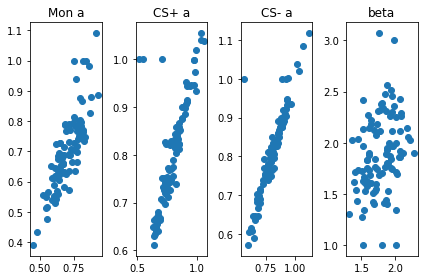

In [52]:
fig, ax = plt.subplots(ncols = 4)
titles = ['Mon a', 'CS+ a', 'CS- a', 'beta']

for p in range(4):
    alphas = st_pars[p,:]
    est_alphas = st_estPars[:,p]
    ax[p].scatter(alphas, est_alphas)
    ax[p].set_title(titles[p])

plt.tight_layout()

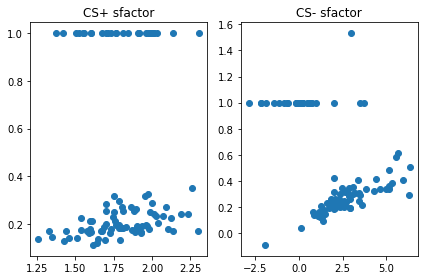

In [53]:
fig, ax = plt.subplots(ncols = 2)
titles = ['CS+ sfactor', 'CS- sfactor']

for p in range(2):
    alphas = mt_pars[p,:]
    est_alphas = mt_estPars[:,p]
    ax[p].scatter(alphas, est_alphas)
    ax[p].set_title(titles[p])

plt.tight_layout()

In [56]:
mt_estPars[flags,:]



TypeError: bad operand type for unary ~: 'list'